In [28]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')

데이터베이스에서 데이터를 가져와서 파이썬으로 데이터 분석을 하는 실습이다.

In [30]:
conn = sqlite3.connect('C:/Users/82106/Desktop/4-1/travel.sqlite/travel.sqlite')
cursor = conn.cursor()

sqlite3.connect() 함수는 SQLite 데이터베이스 파일에 연결한다. 이 함수의 인자로는 데이터베이스 파일의 경로를 전달한다. 여기서는 'C:/Users/82106/Desktop/4-1/travel.sqlite/travel.sqlite'라는 경로에 위치한 데이터베이스 파일에 연결한다.

이 연결(conn)은 데이터베이스에 SQL 쿼리를 실행하거나 데이터베이스의 변화를 저장(commit)하는 등의 작업을 수행할 때 사용된다.

conn.cursor() 메서드는 연결된 데이터베이스에 대한 커서 객체를 생성한다. 커서는 SQL 명령을 실행하고, 데이터베이스에서 데이터를 검색하는 데 사용된다.

커서를 사용하면 SQL 쿼리를 실행하고 결과를 가져오는 등의 작업을 할 수 있다. 예를 들어, cursor.execute("SELECT * FROM table_name") 같은 명령으로 특정 테이블의 모든 데이터를 검색할 수 있다.

In [31]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


sqlite_master에서 타입이 'table'인 항목만 선택하여, 즉 데이터베이스 내에 정의된 모든 테이블에 대한 정보만을 조회하도록 한다

In [32]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [33]:
aircrafts_data['model'] = aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
aircrafts_data

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


select * from aircrafts_data"는 aircrafts_data 테이블의 모든 컬럼과 레코드를 선택하는 SQL 명령이다

In [34]:
airports_data = pd.read_sql_query("select * from airports_data", conn)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [35]:
airports_data['airport_name'] = airports_data['airport_name'].apply(lambda x: json.loads(x)['en'])
airports_data['city'] = airports_data['city'].apply(lambda x: json.loads(x)['en'])

airports_data 데이터에서 airport_name 과 city 칼럼에서 영어로 되어있는 이름만 남겨놓는다.

In [36]:
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,Yakutsk Airport,Yakutsk,"(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,Mirny Airport,Mirnyj,"(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,Khabarovsk-Novy Airport,Khabarovsk,"(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,Yelizovo Airport,Petropavlovsk,"(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,Yuzhno-Sakhalinsk Airport,Yuzhno-Sakhalinsk,"(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,Murmansk Airport,Murmansk,"(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,Abakan Airport,Abakan,"(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,Barnaul Airport,Barnaul,"(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,Anapa Vityazevo Airport,Anapa,"(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [37]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", conn)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [38]:
bookings = pd.read_sql_query("select * from bookings", conn)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [39]:
flights = pd.read_sql_query("select * from flights", conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [40]:
seats = pd.read_sql_query("select * from seats", conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [41]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [42]:
tickets = pd.read_sql_query("select * from tickets", conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


### -> 각 데이터셋을 데이터베이스에서 불러와서 변수이름 붙이기

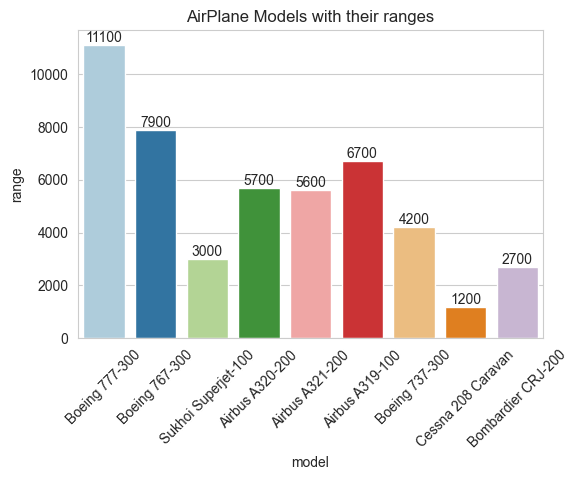

In [44]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(6,4))
ax = sns.barplot(x='model',y='range', data=aircrafts_data, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirPlane Models with their ranges')
plt.xticks(rotation=45)
plt.show()

Boeing 777-300: 가장 긴 비행 거리를 보여주며, 약 11,100km이다.

Boeing 737-800: 7,900km의 비행 거리를 가지고 있다.

Sukhoi Superjet-100: 3,000km의 비행 거리를 보여준다.

Airbus A320-200: 5,700km의 비행 거리를 가지고 있다.

Airbus A220-100: 5,600km의 거리를 날 수 있다.

Airbus A319-100: 6,700km의 비행 거리를 나타낸다.

Boeing 737-300: 4,200km를 비행할 수 있다.

Cessna 208 Caravan: 1,200km의 비행 거리를 가지고 있다.

Bombardier CRJ-200: 가장 짧은 2,700km의 비행 가능 거리를 가지고 있다.

In [45]:
df = pd.read_sql_query("""select aircraft_code, 
                       count(*) as num_seats 
                       from seats
                        group by aircraft_code having num_seats >100""", conn)

df.to_csv('aircraft_seats.csv')

GROUP BY aircraft_code는 각 항공기 코드별로 데이터를 그룹화하고, HAVING num_seats > 100는 그룹화된 결과 중 좌석 수가 100개 이상인 경우만 필터링

In [55]:
df

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


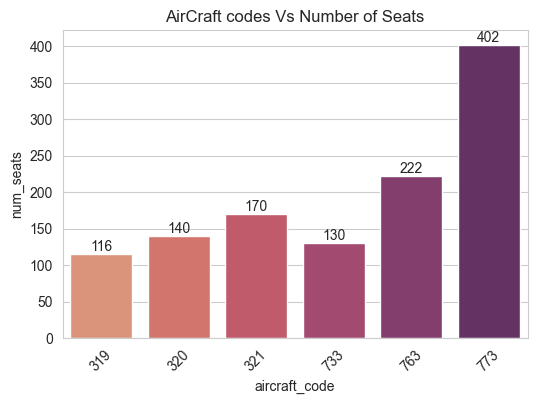

In [47]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(6,4))
ax = sns.barplot(x='aircraft_code',y='num_seats', data=df, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirCraft codes Vs Number of Seats')
plt.xticks(rotation=45)
plt.show()

319: 116개의 좌석을 가지고 있다.

320: 140개의 좌석을 가지고 있다.

321: 170개의 좌석을 가지고 있다.

733: 130개의 좌석을 가지고 있다.

763: 222개의 좌석을 가지고 있다.

773: 402개의 좌석을 가지고 있어, 차트에서 가장 많은 좌석을 가진 항공기 코드이다

In [67]:
crafts = pd.read_sql("""SELECT aircraft_code, json_extract(model, '$.en') as model_en
FROM aircrafts_data
WHERE aircraft_code IN (319, 320, 321, 733, 763, 773);
""", conn)
crafts

,aircraft_code,model_en
0,773,Boeing 777-300
1,763,Boeing 767-300
2,320,Airbus A320-200
3,321,Airbus A321-200
4,319,Airbus A319-100
5,733,Boeing 737-300


sql 쿼리를 사용하지 않고 파이썬 문법으로 실행해보기

In [70]:
# 필요한 aircraft_code 목록 정의 (문자열로 표현)
codes = ['319', '320', '321', '733', '763', '773']

# 해당 코드에 해당하는 행만 필터링
filtered_data = aircrafts_data[aircrafts_data['aircraft_code'].isin(codes)]

# model 컬럼에서 JSON 파싱 없이 직접 사용
filtered_data['model_en'] = filtered_data['model']

# 결과 확인
print(filtered_data[['aircraft_code', 'model_en']])




  aircraft_code         model_en
0           773   Boeing 777-300
1           763   Boeing 767-300
3           320  Airbus A320-200
4           321  Airbus A321-200
5           319  Airbus A319-100
6           733   Boeing 737-300


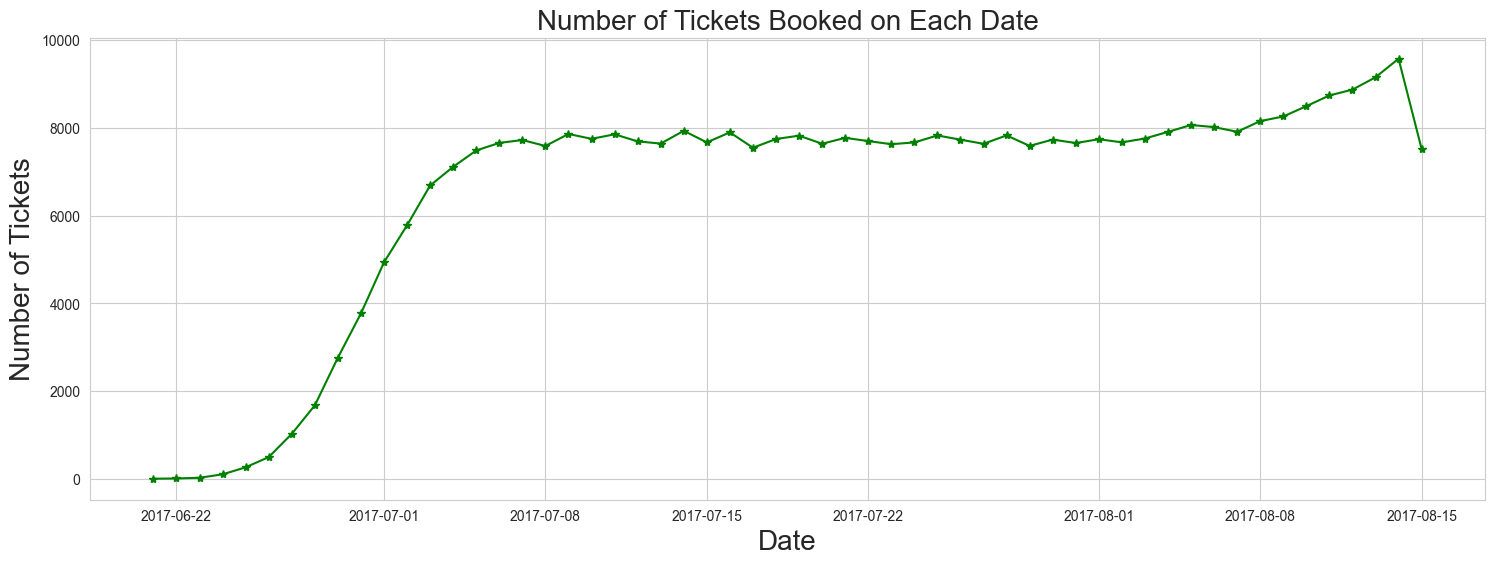

In [52]:
#
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", conn)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
tickets_count = tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(tickets_count.index, tickets_count['date'], color='green', scalex=True, marker = "*")
plt.title('Number of Tickets Booked on Each Date', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

급격한 증가: 6월 말부터 7월 초까지 티켓 예약 수가 급격히 증가하여 7월 초에는 약 8,000장에 이른다. 이는 여름 휴가 시즌 시작과 맞물려 많은 사람들이 여행을 계획하기 때문일 것이다.

안정적인 유지: 7월 초 이후부터 티켓 예약 수는 대체로 안정적으로 유지되며, 큰 변동 없이 8,000장 근처에서 평탄화된다. 이 시기에는 초기의 휴가 계획이 대부분 완료되어 추가적인 예약 증가가 줄어든 것으로 보인다.

다시 증가: 8월 초에 들어서며 예약 수가 다시 증가하기 시작한다. 이는 여름 휴가 마감을 앞두고 마지막 순간에 예약을 하는 사람들이 증가하기 때문일 수 있다.

급격한 감소: 차트의 맨 마지막 부분에서는 8월 15일경에 예약 수가 급격하게 감소한다. 이는 데이터 수집의 종료 또는 특정한 이벤트(예: 주요 공휴일)로 인한 것일 수 있다.

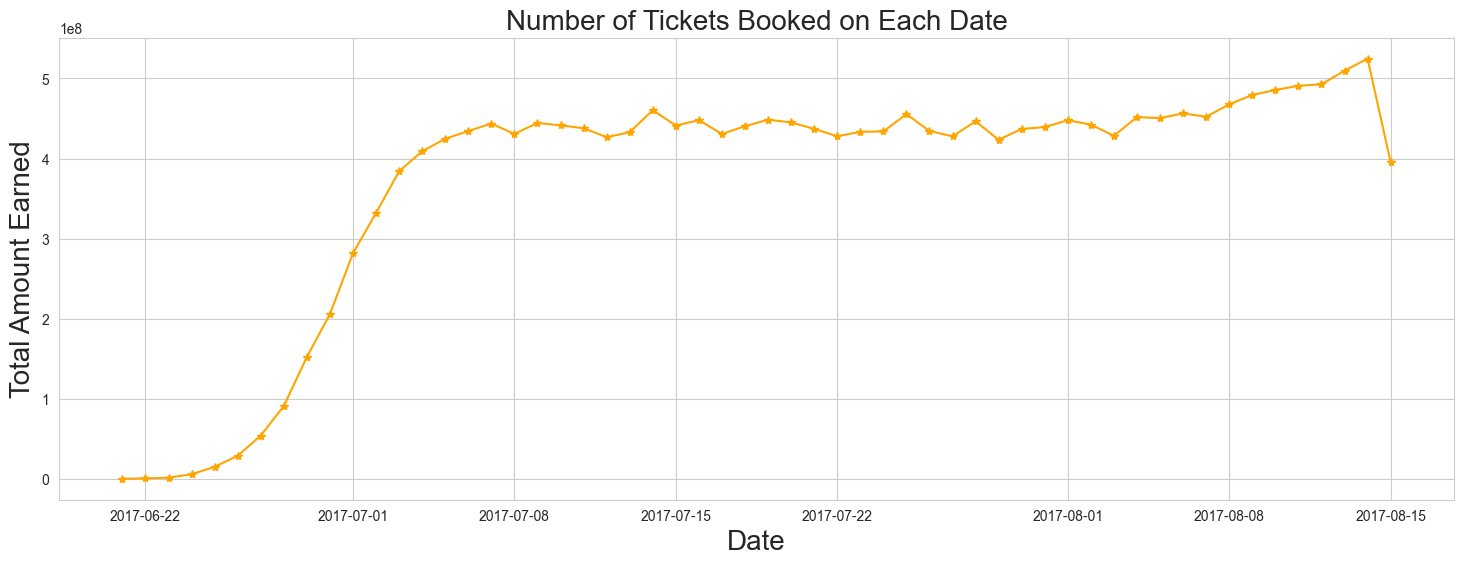

In [54]:
bookings = pd.read_sql_query("select * from bookings", conn)

bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
booking_amount = bookings.groupby('date')[['total_amount']].sum()

plt.figure(figsize=(18,6))
plt.plot(booking_amount.index, booking_amount['total_amount'],color='orange',scalex=True, marker = '*')
plt.title('Number of Tickets Booked on Each Date', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

초기 급등: 6월 말부터 7월 초까지 매출이 급격하게 증가하여, 7월 초에는 최대치에 도달한다. 이 기간 동안 매출이 1억 단위에 이르는 것으로 보아, 휴가 시즌이 시작되면서 많은 사람들이 티켓을 구매한 것으로 해석된다.

평탄화: 7월 초 이후 매출은 상대적으로 안정적인 수준을 유지하며, 큰 변동 없이 일정하게 유지된다. 이는 휴가철이 본격적으로 시작되면서 예약이 일정 수준에서 꾸준히 발생하는 것을 반영한다.

마감기 증가: 8월 초에 다시 매출이 상승하는 경향을 보인다. 이는 여름 휴가 시즌 마지막을 즐기려는 수요가 반영된 결과로 볼 수 있다.

매출 급감: 차트의 마지막 부분에서 매출이 급격히 감소하는데, 이는 데이터 수집 기간의 종료 또는 주요 휴가 시즌이 끝나는 시점과 일치할 수 있다.

In [72]:
#ticket_flights 테이블과 flights 테이블을 flight_id를 기준으로 조인(join)하고, aircraft_code와 fare_conditions로 그룹화(group by)
#그룹화된 데이터에 대해 각 조합의 평균 금액(avg(amount))을 계산,fare_conditions는 항공권의 요금 조건(예: 일반석, 비즈니스석 등)을 나타내며, aircraft_code는 각 항공기의 코드를 나타낸다.
df = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount) 
                        from ticket_flights join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", conn)
df.to_csv('fare_avg_amount.csv')

#ticket_flights 테이블과 flights 테이블을 flight_id를 기준으로 조인(join)하고, aircraft_code와 fare_conditions로 그룹화(group by)

#그룹화된 데이터에 대해 각 조합의 평균 금액(avg(amount))을 계산,fare_conditions는 항공권의 요금 조건(예: 일반석, 비즈니스석 등)을 나타내며, aircraft_code는 각 항공기의 코드를 나타낸다.

python 문법 으로 바꾸기

In [71]:
# 데이터 조인
merged_data = pd.merge(ticket_flights, flights, on='flight_id')

# 그룹화 및 평균 금액 계산
result = merged_data.groupby(['aircraft_code', 'fare_conditions'])['amount'].mean().reset_index()

# 결과 확인
print(result)

   aircraft_code fare_conditions         amount
0            319        Business  113550.557703
1            319         Economy   38311.402347
2            321        Business   34435.662664
3            321         Economy   11534.974764
4            733        Business   41865.626175
5            733         Economy   13985.152000
6            763        Business   82839.842866
7            763         Economy   27594.721829
8            773        Business   57779.909435
9            773         Comfort   32740.552889
10           773         Economy   19265.225693
11           CN1         Economy    6568.552345
12           CR2         Economy   13207.661102
13           SU9        Business   33487.849829
14           SU9         Economy   11220.183400


In [59]:
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


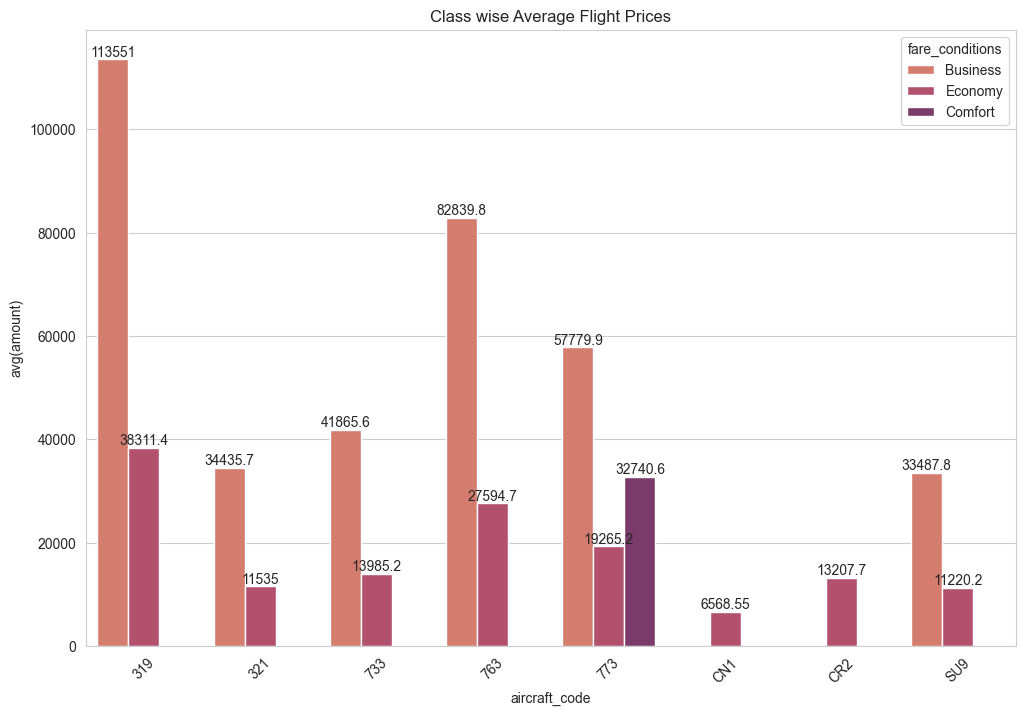

In [60]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='avg(amount)',hue='fare_conditions', data=df, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class wise Average Flight Prices')
plt.xticks(rotation=45)
plt.show()

In [74]:
crafts = pd.read_sql("""SELECT aircraft_code, json_extract(model, '$.en')
                        FROM aircrafts_data
                        where aircraft_code IN (319, 321, 733, 763, 773, 'CN1', 'CR2', 'SU9');""", conn)
crafts

,aircraft_code,"json_extract(model, '$.en')"
0,773,Boeing 777-300
1,763,Boeing 767-300
2,SU9,Sukhoi Superjet-100
3,321,Airbus A321-200
4,319,Airbus A319-100
5,733,Boeing 737-300
6,CN1,Cessna 208 Caravan
7,CR2,Bombardier CRJ-200


In [75]:
revenue = pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as avg_revenue_per_ticket from
                    (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", conn)
revenue.to_csv('revenue.csv')

total_revenue/ticket_count를 계산하여 avg_revenue_per_ticket라는 새로운 컬럼을 생성

ticket_flights 테이블에서 aircraft_code 별로 티켓 수(ticket_count)와 총 수익(total_revenue)을 계산 -> 총수익이라는 새로운 칼럼생성

icket_flights 테이블과 flights 테이블을 flight_id를 기준으로 조인

aircraft_code 별로 그룹화하고, 각 그룹의 티켓 수와 총 수익을 집계

In [76]:
revenue

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


In [77]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate from
                (select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id) as a
                    inner join 
                    (select aircraft_code,count(*) as num_seats from seats
                    group by aircraft_code) as b
                    on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", conn
                  )
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


항공기 코드(aircraft_code), 예약된 좌석 수의 평균(avg(a.seats_count) as booked_seats), 총 좌석 수(b.num_seats), 그리고 예약된 좌석 수의 평균과 총 좌석 수의 비율(avg(a.seats_count)/b.num_seats as occupancy_rate)을 계산

boarding_passes 테이블과 flights 테이블을 조인하여, 각 항공편(flight_id)과 항공기 코드(aircraft_code)별로 승객 수(count(*) as seats_count)를 계산

boarding_passes와 flights 테이블을 flight_id를 기준으로 내부 조인

aircraft_code와 flights.flight_id로 그룹화하여, 각 항공편의 승객 수를 집계

seats 테이블에서 각 항공기 코드별로 총 좌석 수(count(*) as num_seats)를 계산

결과를 aircraft_code별로 그룹화하여 각 항공기의 총 좌석 수를 집계

a와 b 하위 쿼리를 aircraft_code를 기준으로 내부 조인

seats 테이블에서 각 항공기 코드별로 총 좌석 수(count(*) as num_seats)를 계산

aircraft_code별로 그룹화하여 각 항공기의 총 좌석 수를 집계

aircraft_code를 기준으로 내부 조인

조인된 결과를 다시 aircraft_code로 그룹화하고, 각 항공기 코드별로 예약된 좌석 수의 평균, 총 좌석 수, 그리고 점유율을 계산

In [78]:
occupancy_rate['inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [79]:
pd.set_option("display.float_format",str)
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", conn)
total_revenue

occupancy_rate['inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate,inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


ticket_flights 테이블과 flights 테이블을 flight_id를 기준으로 조인하고, aircraft_code별로 amount의 합계(sum(amount) as total_revenue)를 계산하여 총 수익을 구한다

결과를 aircraft_code로 그룹화하여 각 항공기 코드별로 수익을 집계한다

inc Total Annual Turnover를 추가 -> 공기별 총 수익을 점유율로 나눈 값에 특정 증가율을 적용 -> inc occupancy rate는 점유율 증가율을 의미

### 높은 점유율과 수익성: 
773 코드의 항공기는 402좌석의 큰 용량에도 불구하고 65.9%의 점유율을 보이며, 예상 점유율 증가(72.4921%)를 고려할 때 상당히 높은 연간 수익 증가를 기대할 수 있다 (약 3774억).

### 중간 범위의 성능: 
321 코드의 항공기는 170좌석에 52.2%의 점유율을 보이며, 예상 점유율 증가율이 57.4648%로 꽤 높은 편이다. 이는 해당 항공기가 적절한 마케팅과 운영 최적화를 통해 더 높은 수익을 기대할 수 있음을 나타낸다.

### 저성능 항공기: 
CN1 코드의 항공기는 단 12좌석에 50%의 점유율을 보이며, 상대적으로 낮은 연간 수익 증가를 보인다. 이 항공기는 소규모 노선 또는 특수 운행에 적합할 수 있다.

# 결론

결론적으로, 항공사는 수익 데이터를 분석하고 정보에 기반한 결정을 통해 수익성을 극대화할 수 있다. 

총 수익, 티켓당 평균 수익, 항공기별 평균 탑승률과 같은 요소들이 이 분석에서 중요한 역할을 한다. 

개선할 부분을 식별하고, 가격 전략을 조정하며, 노선을 최적화함으로써 항공사는 수익성을 높일 수 있다.;

이런식으로 import sqlite3 를 임포트하여서 데이터베이스를 불러와서 데이터를 분석할 수 있다.
